In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.size

147903

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data = data.drop(columns=['customerID'],axis=1)

In [7]:
data.shape

(7043, 20)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [11]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [12]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [13]:
data['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [14]:
data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [15]:
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [16]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [17]:
data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [18]:
data['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [19]:
data['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [20]:
data['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [21]:
data['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [22]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [23]:
data['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [24]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [25]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

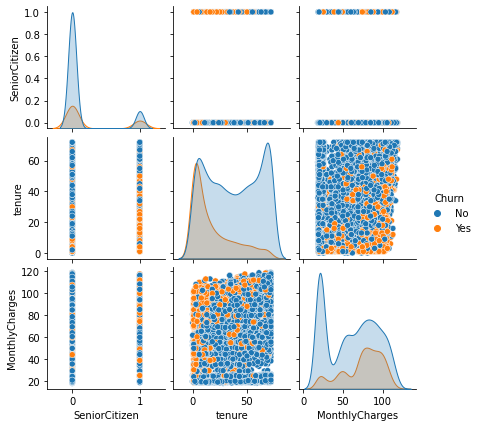

In [26]:
sns.pairplot(data,hue='Churn',size=2)

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

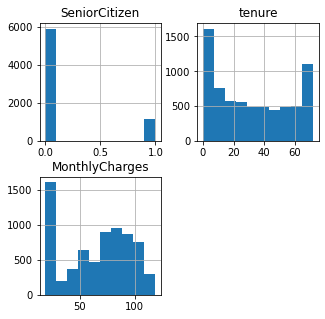

In [27]:
data.hist(figsize=(5,5))

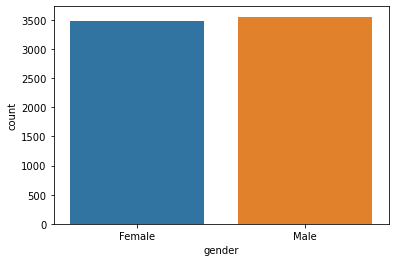

In [28]:
sns.countplot(data['gender'])
plt.show()

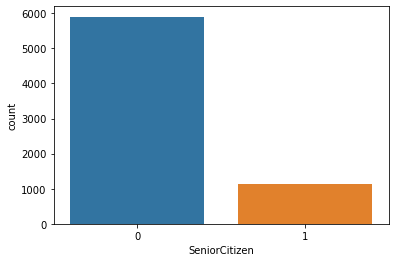

In [29]:
sns.countplot(data['SeniorCitizen'])
plt.show()

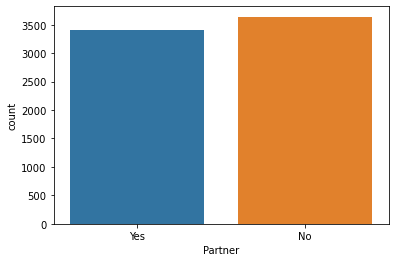

In [30]:
sns.countplot(data['Partner'])
plt.show()

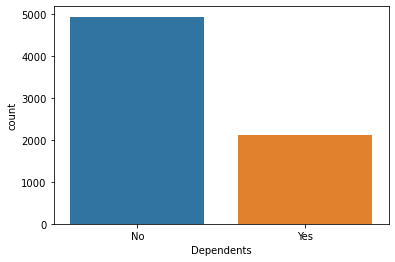

In [31]:
sns.countplot(data['Dependents'])
plt.show()

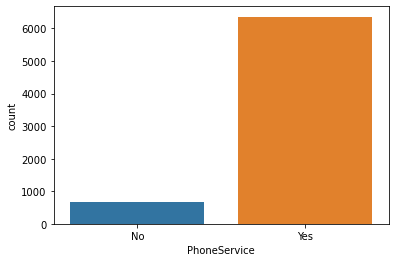

In [32]:
sns.countplot(data['PhoneService'])
plt.show()

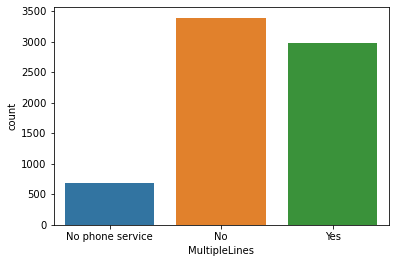

In [33]:
sns.countplot(data['MultipleLines'])
plt.show()

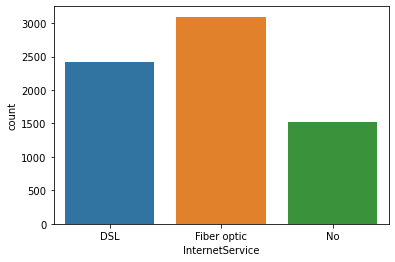

In [34]:
sns.countplot(data['InternetService'])
plt.show()

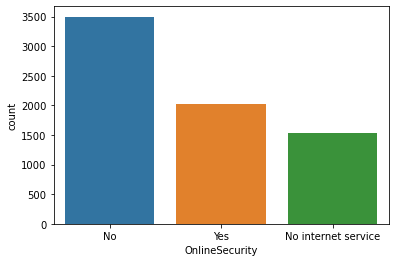

In [35]:
sns.countplot(data['OnlineSecurity'])
plt.show()

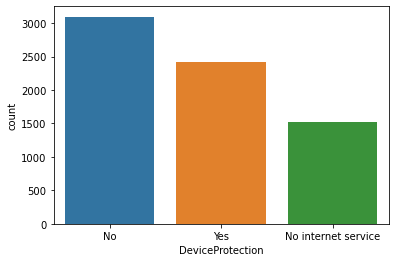

In [36]:
sns.countplot(data['DeviceProtection'])
plt.show()

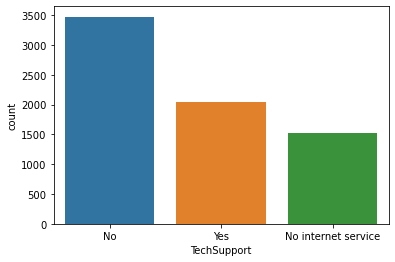

In [37]:
sns.countplot(data['TechSupport'])
plt.show()

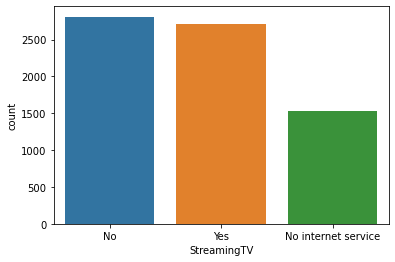

In [38]:
sns.countplot(data['StreamingTV'])
plt.show()

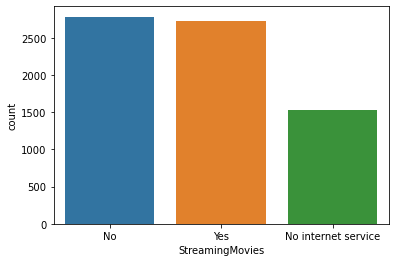

In [39]:
sns.countplot(data['StreamingMovies'])
plt.show()

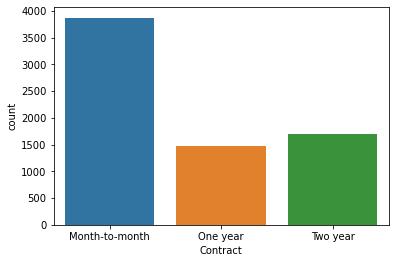

In [40]:
sns.countplot(data['Contract'])
plt.show()

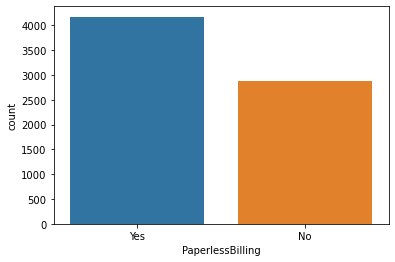

In [41]:
sns.countplot(data['PaperlessBilling'])
plt.show()

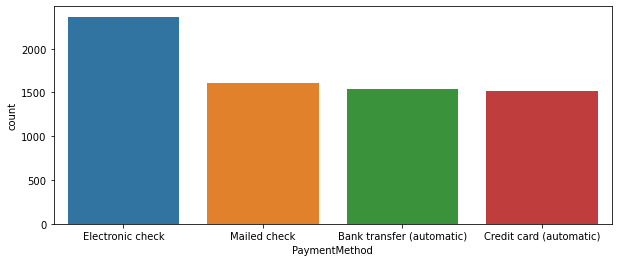

In [42]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(data['PaymentMethod'])
plt.show()

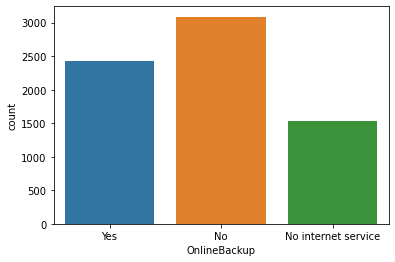

In [43]:
sns.countplot(data['OnlineBackup'])
plt.show()

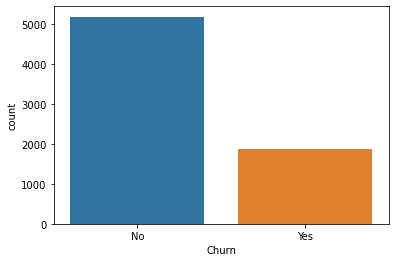

In [44]:
sns.countplot(data['Churn'])
plt.show()

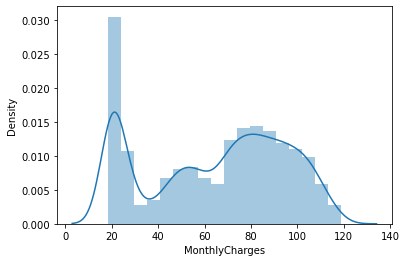

In [45]:
sns.distplot(data['MonthlyCharges'])
plt.show()

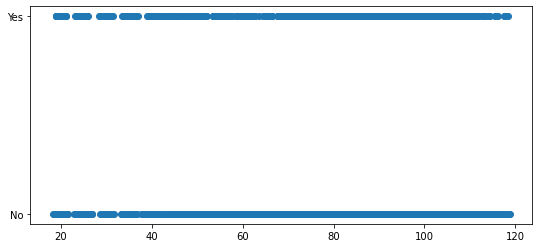

In [46]:
fig, ax = plt.subplots(figsize=(9,4))
plt.scatter(data['MonthlyCharges'],data['Churn'])

<AxesSubplot:xlabel='gender', ylabel='SeniorCitizen'>

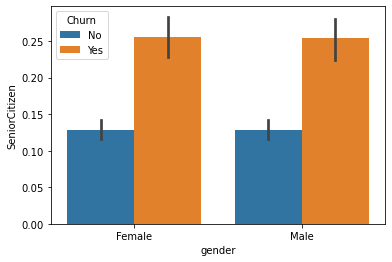

In [47]:
sns.barplot(data['gender'],data['SeniorCitizen'],hue=data['Churn'])

<AxesSubplot:xlabel='PaymentMethod', ylabel='MonthlyCharges'>

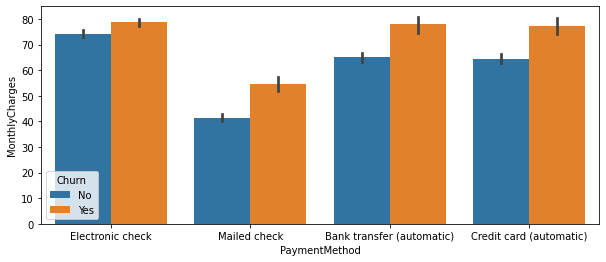

In [48]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data['PaymentMethod'],data['MonthlyCharges'],hue=data['Churn'])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Partner'>

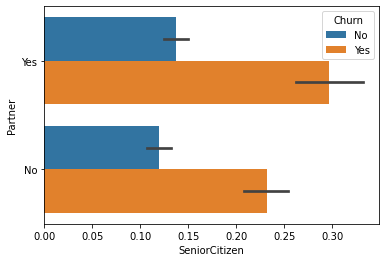

In [49]:
sns.barplot(data['SeniorCitizen'],data['Partner'],hue=data['Churn'])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='OnlineSecurity'>

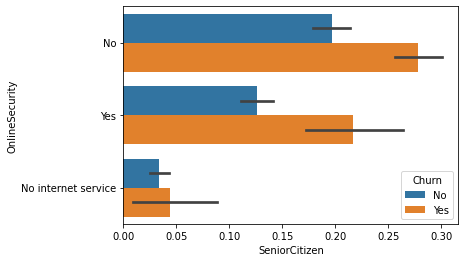

In [50]:
sns.barplot(data['SeniorCitizen'],data['OnlineSecurity'],hue=data['Churn'])

<AxesSubplot:xlabel='TechSupport', ylabel='SeniorCitizen'>

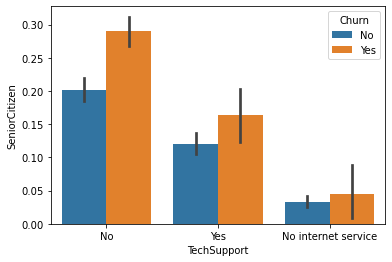

In [51]:
sns.barplot(data['TechSupport'],data['SeniorCitizen'],hue=data['Churn'])

<AxesSubplot:>

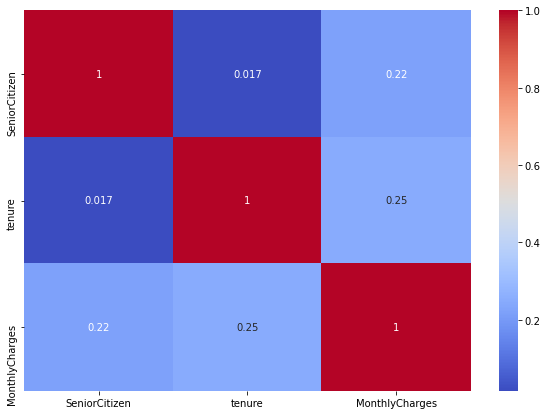

In [52]:
# heat map
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [53]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in data:
    if data[x].dtypes=='object':
        data[x] = le.fit_transform(data[x])

In [54]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [55]:
# treain_test_split
x = data.drop(columns=['Churn'])
y = data['Churn']

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=13)

In [57]:
x_train.shape

(4930, 19)

In [58]:
x_test.shape

(2113, 19)

In [59]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8026502602934217

In [60]:
y_test

416     0
4521    0
4213    1
1580    0
2226    0
       ..
6327    0
93      0
358     1
3525    1
6517    0
Name: Churn, Length: 2113, dtype: int64

In [61]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Churn,,
0,1390,174
1,243,306


In [63]:
confusion_matrix(y_test,y_predict)

array([[1390,  174],
       [ 243,  306]])

In [64]:
precision_score(y_test,y_predict)

0.6375

In [65]:
recall_score(y_test,y_predict)

0.5573770491803278

In [66]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1564
           1       0.64      0.56      0.59       549

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113



In [67]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.7406530998580217

In [68]:
y_predict

array([0, 1, 0, ..., 0, 1, 0])

In [69]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Churn,,
0,1274,290
1,258,291


In [70]:
confusion_matrix(y_test,y_predict)

array([[1274,  290],
       [ 258,  291]])

In [71]:
precision_score(y_test,y_predict)

0.5008605851979346

In [72]:
recall_score(y_test,y_predict)

0.5300546448087432

In [73]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1564
           1       0.50      0.53      0.52       549

    accuracy                           0.74      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.75      0.74      0.74      2113



In [74]:
model = RandomForestClassifier(random_state=13,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.7908187411263606

In [75]:
y_predict

array([0, 0, 1, ..., 0, 0, 0])

In [76]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Churn,,
0,1400,164
1,278,271


In [77]:
confusion_matrix(y_test,y_predict)

array([[1400,  164],
       [ 278,  271]])

In [78]:
precision_score(y_test,y_predict)

0.6229885057471264

In [79]:
recall_score(y_test,y_predict)

0.4936247723132969

In [80]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1564
           1       0.62      0.49      0.55       549

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [81]:
# MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100),random_state=13)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.7529578797917653

In [82]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Churn,,
0,1528,36
1,486,63


In [84]:
confusion_matrix(y_test,y_predict)

array([[1528,   36],
       [ 486,   63]])

In [85]:
precision_score(y_test,y_predict)

0.6363636363636364

In [86]:
recall_score(y_test,y_predict)

0.11475409836065574

In [87]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85      1564
           1       0.64      0.11      0.19       549

    accuracy                           0.75      2113
   macro avg       0.70      0.55      0.52      2113
weighted avg       0.73      0.75      0.68      2113



In [88]:
# KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
print("accuracy:",accuracy_score(y_test,y_predict))

accuracy: 0.7534311405584477


In [90]:
confusion_matrix(y_test,y_predict)

array([[1366,  198],
       [ 323,  226]])

In [91]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Churn,,
0,1366,198
1,323,226


In [92]:
y_predict = model.predict(x_test)

In [93]:
matrix=confusion_matrix(y_test,y_predict)
print(matrix)

[[1366  198]
 [ 323  226]]


<AxesSubplot:>

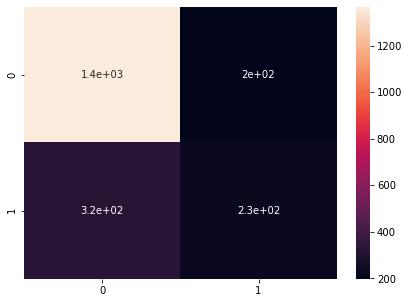

In [94]:
# heat map
plt.figure(figsize = (7,5))
sns.heatmap(matrix,annot=True)

In [95]:
# XGBClassifier
model =XGBClassifier(learning_rate = 0.1,random_state=13,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.7988641741599621

In [96]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Churn,,
0,1404,160
1,265,284


In [98]:
confusion_matrix(y_test,y_predict)

array([[1404,  160],
       [ 265,  284]])

In [99]:
precision_score(y_test,y_predict)

0.6396396396396397

In [100]:
recall_score(y_test,y_predict)

0.517304189435337

In [101]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1564
           1       0.64      0.52      0.57       549

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [102]:
# support victor machine
model = SVC(gamma=0.01,kernel='rbf')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.750591575958353

In [103]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Churn,,
0,1463,101
1,426,123


In [105]:
confusion_matrix(y_test,y_predict)

array([[1463,  101],
       [ 426,  123]])

In [106]:
precision_score(y_test,y_predict)

0.5491071428571429

In [107]:
recall_score(y_test,y_predict)

0.22404371584699453

In [108]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1564
           1       0.55      0.22      0.32       549

    accuracy                           0.75      2113
   macro avg       0.66      0.58      0.58      2113
weighted avg       0.72      0.75      0.71      2113



In [109]:
print(Counter(y_test))

Counter({0: 1564, 1: 549})


In [110]:
# principle componet analysis
pca = PCA()
x = pd.DataFrame(pca.fit_transform(x))

In [111]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-753.005598,41.291295,-13.436116,1.083361,-0.029071,0.194889,-1.462486,-0.807304,-0.182600,0.524198,0.207086,1.241246,0.435827,-0.147790,0.558668,-0.450389,0.351591,-0.579626,0.475469
1,-1791.804165,-2.404902,4.715897,0.298805,-1.334267,1.532713,1.071553,0.741458,-1.492889,-1.134524,-0.084986,0.312694,-0.182912,0.708611,-0.507304,0.302788,-0.087271,-0.039616,-0.191519
2,-3100.868189,7.669119,-22.928748,0.264834,-0.871844,1.993064,-0.613253,-1.038760,0.128367,-0.965605,0.137451,0.757198,-0.271258,0.257533,-0.510965,-0.544382,-0.111098,-0.134459,-0.246683
3,-1857.845814,5.742128,20.986805,0.732332,1.629486,1.454426,0.286138,1.652885,-0.887872,0.197216,-0.043865,0.216109,-0.831787,0.124553,-0.538320,0.374795,-0.038082,0.047002,0.616097
4,-2332.802423,-3.762447,-30.148145,1.033568,-0.271613,0.206128,0.835059,-0.339392,-0.089701,0.030421,-0.075739,-0.634860,0.013402,0.422822,0.511730,-0.356734,-0.223950,-0.122884,0.135155


In [112]:
pca.explained_variance_ratio_

array([9.99598886e-01, 2.53977979e-04, 1.45034938e-04, 3.22129927e-07,
       2.70296755e-07, 2.38325338e-07, 1.84904007e-07, 1.78933009e-07,
       1.54945292e-07, 1.46182956e-07, 1.24125889e-07, 1.17166418e-07,
       8.70365458e-08, 7.24799974e-08, 6.99434272e-08, 5.52410820e-08,
       3.85691681e-08, 2.72987400e-08, 1.39975109e-08])

<AxesSubplot:>

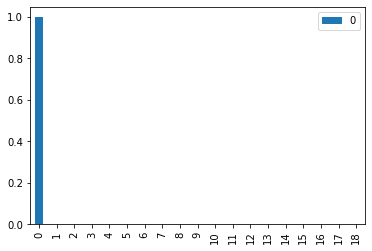

In [113]:
covid_var = pd.DataFrame(pca.explained_variance_ratio_)
covid_var.plot(kind = 'bar')

In [114]:
pca.explained_variance_ratio_[0:-1].sum()

0.9999999860024891

In [115]:
x = x.iloc[:,:-1]
x.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-753.005598,41.291295,-13.436116,1.083361,-0.029071,0.194889,-1.462486,-0.807304,-0.182600,0.524198,0.207086,1.241246,0.435827,-0.147790,0.558668,-0.450389,0.351591,-0.579626
1,-1791.804165,-2.404902,4.715897,0.298805,-1.334267,1.532713,1.071553,0.741458,-1.492889,-1.134524,-0.084986,0.312694,-0.182912,0.708611,-0.507304,0.302788,-0.087271,-0.039616
2,-3100.868189,7.669119,-22.928748,0.264834,-0.871844,1.993064,-0.613253,-1.038760,0.128367,-0.965605,0.137451,0.757198,-0.271258,0.257533,-0.510965,-0.544382,-0.111098,-0.134459
3,-1857.845814,5.742128,20.986805,0.732332,1.629486,1.454426,0.286138,1.652885,-0.887872,0.197216,-0.043865,0.216109,-0.831787,0.124553,-0.538320,0.374795,-0.038082,0.047002
4,-2332.802423,-3.762447,-30.148145,1.033568,-0.271613,0.206128,0.835059,-0.339392,-0.089701,0.030421,-0.075739,-0.634860,0.013402,0.422822,0.511730,-0.356734,-0.223950,-0.122884


In [116]:
#Dataframe for models
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier(),
          "MPL":MLPClassifier(),
          "XGB": XGBClassifier(),
          "SVM": SVC()}
          
          

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [117]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8026502602934217,
 'Random Forest': 0.7946048272598202,
 'DecisionTree': 0.7378135352579271,
 'KNN': 0.7534311405584477,
 'MPL': 0.7179365830572646,
 'XGB': 0.7875059157595835,
 'SVM': 0.7401798390913393}

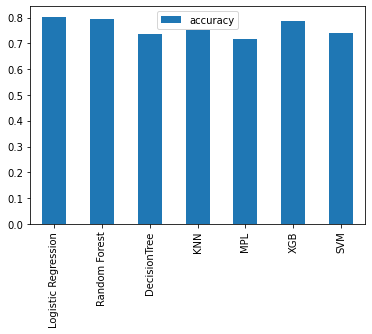

In [118]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();